# ¿ES UN PAJARO, ES UN AVION? ¡NO, ES SUPERMAN!

Este código verifica la conectividad a Internet en Kaggle utilizando un intento de conexión a la dirección IP '1.1.1.1' en el puerto 53. Si la conexión falla, se genera una excepción indicando la falta de conexión a Internet. El comentario proporciona información adicional sobre la verificación telefónica necesaria en Kaggle.

In [1]:
# Nota: Kaggle requiere verificación telefónica para utilizar Internet o una GPU. Si aún no has realizado esto, la celda a continuación fallará.
#       Este código está aquí solo para comprobar si tu conexión a Internet está habilitada. No realiza ninguna otra acción.
#       Aquí hay un hilo de ayuda sobre cómo verificar tu número de teléfono: https://www.kaggle.com/product-feedback/135367

import socket
import warnings

try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex:
    raise Exception("DETENER: Sin conexión a Internet. Haz clic en '>|' en la esquina superior derecha y activa el interruptor 'Internet'")


Este código verifica si se está ejecutando en Kaggle y, en caso afirmativo, utiliza pip para actualizar las bibliotecas **fastai** y **duckduckgo_search** a sus últimas versiones. El comentario proporciona información adicional sobre la importancia de asegurarse de tener las últimas versiones de las bibliotecas necesarias. Además, se advierte que se pueden ignorar de manera segura las advertencias o errores que pueda generar pip.

In [2]:
# Es una buena idea asegurarse de que estás ejecutando la última versión de cualquier biblioteca que necesites.
# `!pip install -Uqq <bibliotecas>` actualiza a la última versión de <bibliotecas>
# NB: Puedes ignorar de manera segura cualquier advertencia o error que pip arroje sobre ejecutarse como root o incompatibilidades.
import os

# Verifica si el entorno de ejecución es Kaggle
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# Si se está ejecutando en Kaggle, actualiza las bibliotecas especificadas
if iskaggle:
    !pip install -Uqq fastai duckduckgo_search


Veremos cómo podemos empezar a identificar imágenes con inteligencia artificial en solo unos minutos, utilizando recursos completamente gratuitos.

* Utilizar DuckDuckGo para buscar imágenes de "fotos de aves volando".
* Utilizar DuckDuckGo para buscar imágenes de "fotos de aviones volando".
* Utilizar DuckDuckGo para buscar imágenes de "fotos de superman volando".
* Ajustar finamente una red neuronal preentrenada para reconocer estos dos grupos.
* Intentar ejecutar este modelo en una imagen de un pájaro y ver si funciona."

## PASO 1: Preparando el entorno

In [3]:
!pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.6 MB/s eta 0:00:00


El código `!pip install fastbook` se utiliza para instalar la biblioteca Fastbook. Fastbook es parte del curso "Practical Deep Learning for Coders" de [fast.ai](http://fast.ai). Esta biblioteca proporciona herramientas y utilidades específicas para facilitar el aprendizaje y la implementación práctica de técnicas de aprendizaje profundo.

In [4]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=33):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

Este fragmento de código utiliza la biblioteca `fastbook` y `fastai` para realizar una búsqueda de imágenes en DuckDuckGo. Aquí hay una breve explicación del código:

1.  `from fastbook import *`: Importa todo el contenido del módulo `fastbook`. Esto incluye funciones y utilidades específicas del curso de [fast.ai](http://fast.ai).
    
2.  `from fastai.vision.widgets import *`: Importa funciones y clases relacionadas con widgets visuales en el contexto de [fast.ai](http://fast.ai). Esto puede incluir herramientas para visualización de imágenes, gráficos, etc.
    
3.  La función `search_images(term, max_images=30)` realiza una búsqueda de imágenes en DuckDuckGo utilizando el término proporcionado (`term`). La función devuelve una lista de URLs de imágenes. El parámetro `max_images` controla el número máximo de imágenes que se deben recuperar (por defecto, se establece en 30).
    
4.  `print(f"Searching for '{term}'")`: Imprime un mensaje indicando la búsqueda que se está realizando.
    
5.  `return L(search_images_ddg(term, max_images=max_images))`: Utiliza la función `search_images_ddg` para realizar la búsqueda y luego envuelve los resultados en un objeto de tipo `L` (una lista extendida, parte de la biblioteca `fastcore` que está integrada en `fastai`). Este objeto `L` esencialmente extiende la funcionalidad de una lista estándar de Python con algunas funciones adicionales.
    

En resumen, este código proporciona una función simple para realizar búsquedas de imágenes en DuckDuckGo dada una palabra clave (`term`). Ten en cuenta que esta función depende de la biblioteca `fastbook` y `fastai`, por lo que necesitarás tener esas bibliotecas instaladas en tu entorno de Python para ejecutar con éxito este código. Además, asegúrate de tener acceso a Internet para realizar la búsqueda de imágenes en línea.

## PASO 2: Buscando las imagenes

In [5]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('perejil', max_images=1)
urls[0]

Searching for 'perejil'


'https://1.bp.blogspot.com/-ZUBxTHen98U/YGBcyGKrt6I/AAAAAAAAGQo/b3wsJ5MSrroXPKbNmLS6GX428LwfuafxACNcBGAsYHQ/w1200-h630-p-k-no-nu/perejil.jpg'

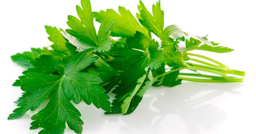

In [6]:
from fastdownload import download_url
dest = 'perejil.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [7]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('cilantro', max_images=1)
urls[0]

Searching for 'cilantro'


'https://citywideproduce.com/wp-content/uploads/2020/09/Cilantro-e1602773747605.jpg'

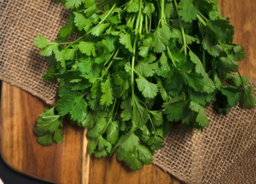

In [8]:
from fastdownload import download_url
dest = 'cilantro.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [9]:
searches = 'cilantro','perejil'
path = Path('cilantro_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'cilantro photo'
Searching for 'cilantro sun photo'
Searching for 'cilantro shade photo'
Searching for 'perejil photo'
Searching for 'perejil sun photo'
Searching for 'perejil shade photo'


In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

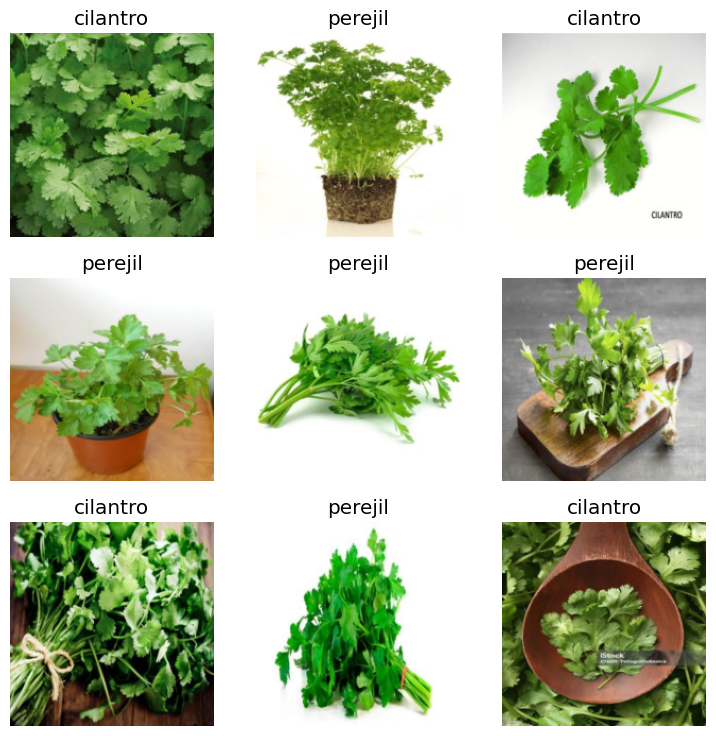

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 201MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.218323,2.178282,0.540541,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.650874,1.429723,0.351351,00:16
1,0.450998,0.668506,0.162162,00:17
2,0.401266,0.537348,0.135135,00:16


In [13]:
is_bird,_,probs = learn.predict(PILImage.create('cilantro.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: cilantro.
Probability it's a bird: 0.9913
